<h1><font color='blue'> 8E and 8F: Finding the Probability P(Y==1|X)</font></h1>

<h2><font color='Geen'> 8E: Implementing Decision Function of SVM RBF Kernel</font></h2>

<font face=' Comic Sans MS' size=3>After we train a kernel SVM model, we will be getting support vectors and their corresponsing coefficients $\alpha_{i}$

Check the documentation for better understanding of these attributes: 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
<img src='https://i.imgur.com/K11msU4.png' width=500>

As a part of this assignment you will be implementing the ```decision_function()``` of kernel SVM, here decision_function() means based on the value return by ```decision_function()``` model will classify the data point either as positive or negative

Ex 1: In logistic regression After traning the models with the optimal weights $w$ we get, we will find the value $\frac{1}{1+\exp(-(wx+b))}$, if this value comes out to be < 0.5 we will mark it as negative class, else its positive class

Ex 2: In Linear SVM After traning the models with the optimal weights $w$ we get, we will find the value of $sign(wx+b)$, if this value comes out to be -ve we will mark it as negative class, else its positive class.

Similarly in Kernel SVM After traning the models with the coefficients $\alpha_{i}$ we get, we will find the value of 
$sign(\sum_{i=1}^{n}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here $K(x_{i},x_{q})$ is the RBF kernel. If this value comes out to be -ve we will mark $x_{q}$ as negative class, else its positive class.

RBF kernel is defined as: $K(x_{i},x_{q})$ = $exp(-\gamma ||x_{i} - x_{q}||^2)$

For better understanding check this link: https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation
</font>

## Task E

> 1. Split the data into $X_{train}$(60), $X_{cv}$(20), $X_{test}$(20)

> 2. Train $SVC(gamma=0.001, C=100.)$ on the ($X_{train}$, $y_{train}$)

> 3. Get the decision boundry values $f_{cv}$ on the $X_{cv}$ data  i.e. ` `$f_{cv}$ ```= decision_function(```$X_{cv}$```)```  <font color='red'>you need to implement this decision_function()</font>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.svm import SVC

In [2]:
X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [3]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train)

### Pseudo code

clf = SVC(gamma=0.001, C=100.)<br>
clf.fit(Xtrain, ytrain)

<font color='green'>def</font> <font color='blue'>decision_function</font>(Xcv, ...): #use appropriate parameters <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='green'>for</font> a data point $x_q$ <font color='green'>in</font> Xcv: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='grey'>#write code to implement $(\sum_{i=1}^{\text{all the support vectors}}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here the values $y_i$, $\alpha_{i}$, and $intercept$ can be obtained from the trained model</font><br>
   <font color='green'>return</font> <font color='grey'><i># the decision_function output for all the data points in the Xcv</i></font>
    
fcv = decision_function(Xcv, ...)  <i># based on your requirement you can pass any other parameters </i>

<b>Note</b>: Make sure the values you get as fcv, should be equal to outputs of clf.decision_function(Xcv)


In [4]:
# you can write your code here
clf = SVC(gamma=0.001, C=100.)
clf.fit(X_train, y_train)

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [5]:
a  = clf.dual_coef_
b  = clf._intercept_
sv = clf.support_vectors_
gamma = 0.001

In [6]:
def K_rbf(point,j,sv):
    norm2 = np.linalg.norm(sv[j]-point)
    k = np.exp(-gamma*(norm2**2))
    return k
    

In [7]:
def decision_function(X,a,b,sv):
    decision_output = []
    dual_coefs = a[0]
    for point in X:
        decision_made = 0
        for j in range(np.shape(sv)[0]):
            #norm2 = np.linalg.norm(sv[j]-point) 
            
            decision_made=decision_made + dual_coefs[j] *  K_rbf(point,j,sv) 
        decision_made = (decision_made- b)[0]      
        decision_output.append(decision_made)
    return np.array(decision_output)
    
                                           
                                           

In [8]:
decision_cv = decision_function(X_cv,a,b,sv)
decision_cv[:10]

array([-0.76443341, -2.41851071, -1.76821112, -2.69688212, -2.49742518,
       -2.80311655, -1.78074948, -2.14381409, -2.15336257,  1.73311625])

In [9]:
decision_sklearn =clf.decision_function(X_cv)
decision_sklearn[:10]

array([-0.76443341, -2.41851071, -1.76821112, -2.69688212, -2.49742518,
       -2.80311655, -1.78074948, -2.14381409, -2.15336257,  1.73311625])

In [10]:
#https://stackoverflow.com/questions/28503932/calculating-decision-function-of-svm-manually

In [11]:
decision_test = decision_function(X_test,a,b,sv)

<h2><font color='Geen'> 8F: Implementing Platt Scaling to find P(Y==1|X)</font></h2>

Check this <a href='https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a'>PDF</a>
<img src='https://i.imgur.com/CAMnVnh.png'>


## TASK F


> 4. Apply SGD algorithm with ($f_{cv}$, $y_{cv}$) and find the weight $W$ intercept $b$ ```Note: here our data is of one dimensional so we will have a one dimensional weight vector i.e W.shape (1,)``` 

> Note1: Don't forget to change the values of $y_{cv}$ as mentioned in the above image. you will calculate y+, y- based on data points in train data

> Note2: the Sklearn's SGD algorithm doesn't support the real valued outputs, you need to use the code that was done in the `'Logistic Regression with SGD and L2'` Assignment after modifying loss function, and use same parameters that used in that assignment.
<img src='https://i.imgur.com/zKYE9Oc.png'>
if Y[i] is 1, it will be replaced with y+ value else it will replaced with y- value

> 5. For a given data point from $X_{test}$, $P(Y=1|X) = \frac{1}{1+exp(-(W*f_{test}+ b))}$ where ` `$f_{test}$ ```= decision_function(```$X_{test}$```)```, W and b will be learned as metioned in the above step

In [23]:
Np,Nm = len(y_train[y_train==1]),len(y_train[y_train==0]) #modified to train(rectified)
Np,Nm

(908, 2092)

In [28]:
Np,Nm =  (y_train==1).sum(),(y_train==0).sum()
Np,Nm # N+ and N-

(908, 2092)

In [24]:
y_cv_real = np.array([(Np+1)/(Np+2) if x==1 else 1/(Nm+2) for x in y_cv ]) #modifying y_cv to change it to real values

In [25]:
unique_elements, counts_elements = np.unique(y_cv_real, return_counts=True)

In [26]:
unique_elements, counts_elements 

(array([4.77554919e-04, 9.98901099e-01]), array([697, 303], dtype=int64))

In [16]:
def logloss(y_true,y_pred):
    '''In this function, we will compute log loss '''
    loss=0
    for i in range(len(y_true)):
        loss+=((y_true[i]*np.log10(y_pred[i]))+((1-y_true[i])*np.log10((1-y_pred[i]))))
        
    loss =(-1*loss)/len(y_true)
    return loss
    

# Custom SGD

In [17]:
def initialize_weights(dim):
    ''' In this function, we will initialize our weights and bias'''   
    w= np.zeros_like(dim)
    b=0
    return w,b
def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    
    sig = 1/(1+np.exp(-z))
    return sig

def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
    dw0 = np.dot(w, x) + b
    dw = x*(y - sigmoid(dw0)) - ((alpha/(N)) * w)
    return dw
def gradient_db(x,y,w,b):
   '''In this function, we will compute gradient w.r.to b '''
   db0 = np.dot(w, x) + b
   db = y - sigmoid(db0)
   return db
   
def find_proba(w,b, X):
    
    N = len(X)
    predict = []
    for i in range(N):
        z=np.dot(w,X[i])+b       
        predict.append(sigmoid(z))
    return np.array(predict)
   
def train(X_train,y_train,epochs,alpha,eta0):
    ''' In this function, we will implement logistic regression'''
    
    w,b = initialize_weights(X_train[0]) 
    gw,gb = 0,0
    trainloss_list = []
    testloss_list = []
    N = len(X_train)
    for i in range(epochs):
        
        print("Epoch: "+str(i))
        
        for i in range(N):
            gw=gradient_dw(X_train[i],y_train[i],w,b,alpha,N)
           
            gb=gradient_db(X_train[i],y_train[i],w,b)
           
           
            w=w+(eta0*gw)
            b=b+(eta0*gb)
        
        
        ytrain_pred = find_proba(w,b, X_train)
        
        losstr =logloss(y_train,ytrain_pred)
        print("Train loss: ",losstr)
        
        trainloss_list.append(losstr)
    
        
        
    return w,b,trainloss_list
alpha=0.0001
eta0=0.0001
N=len(X_cv)
epochs=50
w,b,trainloss_list=train(decision_cv,y_cv_real,epochs,alpha,eta0) #SGD on f_cv and y_cv_modified


Epoch: 0
Train loss:  0.2596166100777763
Epoch: 1
Train loss:  0.2290371142276691
Epoch: 2
Train loss:  0.2060636799229681
Epoch: 3
Train loss:  0.18843448358573914
Epoch: 4
Train loss:  0.17461286084938965
Epoch: 5
Train loss:  0.16355725961646134
Epoch: 6
Train loss:  0.15455347420680648
Epoch: 7
Train loss:  0.1471030276331263
Epoch: 8
Train loss:  0.1408510828307992
Epoch: 9
Train loss:  0.13554001356896733
Epoch: 10
Train loss:  0.13097921300200227
Epoch: 11
Train loss:  0.1270251599929128
Epoch: 12
Train loss:  0.12356802611682541
Epoch: 13
Train loss:  0.12052251371488411
Epoch: 14
Train loss:  0.11782147662678476
Epoch: 15
Train loss:  0.1154114027370653
Epoch: 16
Train loss:  0.11324916355190255
Epoch: 17
Train loss:  0.11129964028133127
Epoch: 18
Train loss:  0.10953396579369408
Epoch: 19
Train loss:  0.10792820571883352
Epoch: 20
Train loss:  0.1064623570396962
Epoch: 21
Train loss:  0.10511957920337044
Epoch: 22
Train loss:  0.10388559759499964
Epoch: 23
Train loss:  0.1027

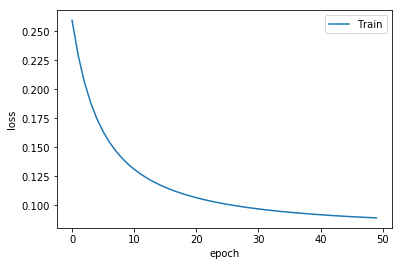

In [22]:
import matplotlib.pyplot as plt
plt.plot(range(epochs),trainloss_list)

plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train'])
plt.show()

In [19]:
decision_test[:100]

array([-2.09859483,  0.15745993, -0.18882511, -2.43060079,  0.8270389 ,
       -2.82150736, -2.26120895, -3.03068356, -4.10011678, -2.45545341,
        1.82360666, -1.35025104, -2.57662381, -2.45166076, -2.23664788,
       -1.97761124, -0.32465468,  3.04973076, -2.77280628, -3.40452629,
       -1.52031542, -2.63825913, -4.18328145,  0.89401201, -2.68944977,
       -2.6255718 , -2.83297529, -3.1358819 , -2.53671379, -0.32647612,
       -3.66785681, -2.27444101, -0.62456175, -1.96098587, -1.08299093,
       -3.03674687, -3.0883069 ,  3.20093489, -0.89075043, -2.04155068,
        0.58323133,  2.1447849 , -2.6120149 ,  0.8441062 , -3.49024625,
        2.37453505, -4.12379012, -2.41212015, -3.03648899, -3.49285601,
       -3.07399418, -3.22873744, -1.21274132, -2.15619256, -3.50726994,
       -0.92297137, -1.85545622, -2.88634775, -3.56635879, -1.84886796,
       -2.43338317, -1.42028604, -2.76693454, -3.76134841,  0.12695645,
       -3.24370601, -1.42292395,  1.96861955, -3.08763231,  0.69

In [20]:
pYgX = 1/(1+(np.exp(-1*((w*decision_test) + b))))

In [21]:
pYgX[:100]

array([0.07184868, 0.52221448, 0.42129499, 0.04981921, 0.70572018,
       0.03207765, 0.06011687, 0.02527186, 0.00733687, 0.04845659,
       0.88535927, 0.15703877, 0.04230541, 0.04866223, 0.06176626,
       0.08191149, 0.38299393, 0.97020261, 0.0339004 , 0.0164445 ,
       0.13238842, 0.03946998, 0.00665919, 0.72177488, 0.03725442,
       0.04003834, 0.03166242, 0.02240261, 0.04424419, 0.38248894,
       0.01212593, 0.05924545, 0.30389679, 0.08339073, 0.2031389 ,
       0.02509718, 0.02365851, 0.97492592, 0.24210188, 0.07644284,
       0.64303746, 0.9184224 , 0.04065431, 0.70986258, 0.01489419,
       0.93647692, 0.00713728, 0.05085593, 0.02510458, 0.01484932,
       0.0240496 , 0.0201363 , 0.17960051, 0.06746957, 0.01460389,
       0.23523158, 0.09335835, 0.02979738, 0.01363888, 0.09401483,
       0.04966487, 0.14646295, 0.0341268 , 0.01087962, 0.5132768 ,
       0.01979261, 0.14607638, 0.90153231, 0.0236768 , 0.67330486,
       0.07448685, 0.45100124, 0.28830753, 0.85500199, 0.48047

__Note: in the above algorithm, the steps 2, 4 might need hyper parameter tuning, To reduce the complexity of the assignment we are excluding the hyerparameter tuning part, but intrested students can try that__


If any one wants to try other calibration algorithm istonic regression also please check these tutorials

1. http://fa.bianp.net/blog/tag/scikit-learn.html#fn:1

2. https://drive.google.com/open?id=1MzmA7QaP58RDzocB0RBmRiWfl7Co_VJ7

3. https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a

4. https://stat.fandom.com/wiki/Isotonic_regression#Pool_Adjacent_Violators_Algorithm
